In [70]:
import csv
import matplotlib.pyplot as plt
from math import log, sqrt

# load all the data from a csv file
def loadDataMoreInputs(fileName):
    data = []
    dataNames = []
    with open(fileName) as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')
        line_count = 0
        for row in csv_reader:
            if line_count == 0:
                dataNames = row
            else:
                data.append(row)
            line_count += 1
    return dataNames, data

# extract a particular feature (column)
def extractFeature(allData, names, featureName):
    pos = names.index(featureName)
    return [(data[pos]) for data in allData]

# plot a histogram for some data x
def plotDataHistogram(x, variableName):
    n, bins, patches = plt.hist(x, 20)
    plt.title('Histogram of ' + variableName)
    plt.show()

In [71]:
import pandas as pd

dataNames,data = loadDataMoreInputs("./data/surveyDataSience.csv")

In [42]:
print(f"nr respondeti:{len(data)-1}")


nr respondeti:25973


In [43]:
print(f"Nr attr:{len(dataNames)}")
types = ""
for x in data[1]:
    types+=str(type(x))+" "
print(types)

Nr attr:369
<class 'str'> <class 'str'> <class 'str'> <class 'str'> <class 'str'> <class 'str'> <class 'str'> <class 'str'> <class 'str'> <class 'str'> <class 'str'> <class 'str'> <class 'str'> <class 'str'> <class 'str'> <class 'str'> <class 'str'> <class 'str'> <class 'str'> <class 'str'> <class 'str'> <class 'str'> <class 'str'> <class 'str'> <class 'str'> <class 'str'> <class 'str'> <class 'str'> <class 'str'> <class 'str'> <class 'str'> <class 'str'> <class 'str'> <class 'str'> <class 'str'> <class 'str'> <class 'str'> <class 'str'> <class 'str'> <class 'str'> <class 'str'> <class 'str'> <class 'str'> <class 'str'> <class 'str'> <class 'str'> <class 'str'> <class 'str'> <class 'str'> <class 'str'> <class 'str'> <class 'str'> <class 'str'> <class 'str'> <class 'str'> <class 'str'> <class 'str'> <class 'str'> <class 'str'> <class 'str'> <class 'str'> <class 'str'> <class 'str'> <class 'str'> <class 'str'> <class 'str'> <class 'str'> <class 'str'> <class 'str'> <class 'str'> <class '

In [44]:
sum = 0
for person in data[1:]:
    for x in person[:7]: # pe primi 7 coloane sa nu fie nulle
        if x == "":
            continue
    sum+=1
sum

25973

In [45]:
data[0]

['Duration (in seconds)',
 'What is your age (# years)?',
 'What is your gender? - Selected Choice',
 'In which country do you currently reside?',
 'What is the highest level of formal education that you have attained or plan to attain within the next 2 years?',
 'Select the title most similar to your current role (or most recent title if retired): - Selected Choice',
 'For how many years have you been writing code and/or programming?',
 'What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - Python',
 'What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - R',
 'What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - SQL',
 'What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - C',
 'What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - C++',
 'What pro

In [46]:
def map_ed_to_years(str):

    if str == "Bachelor’s degree":
        return 3
    if str == "Master’s degree":
        return 5
    if str == "Doctoral degree":
        return 8
    return 0
    
toti = 0
ro = 0
stud_ro = 0
ro_fem = 0
stud_ro_fem = 0

for person in data[1:]:
    years = map_ed_to_years(person[4])
    toti += years
    if(person[3] == "Romania"):
        ro += years
        stud_ro +=1
        if(person[2] == "Woman"):
            ro_fem += years
            stud_ro_fem +=1

print(f"Medie toti:{toti/25973}")
print(f"Medie romani:{ro/stud_ro}")
print(f"Medie romani femei:{ro_fem/stud_ro_fem}")
print(f"Mr stud ro fem cu date complete:{stud_ro_fem}")

        

    

Medie toti:3.9556847495476073
Medie romani:4.163934426229508
Medie romani femei:4.75
Mr stud ro fem cu date complete:16


In [47]:
women = []
for person in data[1:]:

    if(person[2] == "Woman"):
        women.append(person)
varsta_python = 0;
femei_python = 0
romance_python = 0
varsta_cpp = 0;
femei_cpp = 0
romance_cpp = 0
for woman in women:
    if woman[7] == "Python":
        varsta_python += int(woman[1].split("-")[0].rstrip('+'))
        femei_python+=1
        if(woman[3] == "Romania"):
            romance_python +=1
    if woman[11] == "C++":
        varsta_cpp += int(woman[1].split("-")[0].rstrip('+'))
        femei_cpp+=1
        if(woman[3] == "Romania"):
            romance_cpp +=1 

print(f"Romance ce codeaza python:{romance_python}")
print(f"Romance ce codeaza c++:{romance_cpp}")
print(f"Medie varsta femei python:{varsta_python/femei_python}")
print(f"Medie varsta femei c++:{varsta_cpp/femei_cpp}")


Romance ce codeaza python:12
Romance ce codeaza c++:4
Medie varsta femei python:26.77121485684808
Medie varsta femei c++:24.04732510288066


In [48]:
for i in range(1,len(dataNames)):
    dataSet = []
    for j in range(1, len(data)):
        dataSet.append(data[j][i])
    print(f"{data[0][i]} Values:{set(dataSet)}")

QuestionTimes = []
for i in range(1,len(data)):
    QuestionTimes.append(int(data[i][0]))
print(f"{data[0][0]} min:{min(QuestionTimes)}")
print(f"{data[0][0]} max:{max(QuestionTimes)}")


What is your age (# years)? Values:{'40-44', '60-69', '25-29', '45-49', '35-39', '70+', '55-59', '50-54', '22-24', '18-21', '30-34'}
What is your gender? - Selected Choice Values:{'Nonbinary', 'Prefer to self-describe', 'Woman', 'Man', 'Prefer not to say'}
In which country do you currently reside? Values:{'Denmark', 'France', 'United Arab Emirates', 'Kenya', 'Hong Kong (S.A.R.)', 'Iran, Islamic Republic of...', 'Ethiopia', 'Australia', 'Russia', 'Sweden', 'Israel', 'Ireland', 'Turkey', 'Thailand', 'Viet Nam', 'Kazakhstan', 'Colombia', 'Sri Lanka', 'Indonesia', 'China', 'Netherlands', 'Uganda', 'Nepal', 'Tunisia', 'Czech Republic', 'Other', 'Japan', 'Taiwan', 'Portugal', 'Ukraine', 'India', 'Belgium', 'Singapore', 'Bangladesh', 'Ghana', 'Greece', 'Chile', 'Peru', 'South Korea', 'Egypt', 'United States of America', 'Algeria', 'Belarus', 'Philippines', 'Germany', 'Pakistan', 'Iraq', 'Spain', 'Austria', 'Italy', 'Nigeria', 'Brazil', 'South Africa', 'Canada', 'Norway', 'Saudi Arabia', 'Arge

In [ ]:
map_to_value = {
    "< 1 years": 0.5,
    "1-3 years": 2,
    "3-5 years": 4,
    "5-10 years": 7.5,
    "10-20 years": 15,
    "20+ years": 25,
    "I have never written code":
}
years_of_activity = []
for i in range(1,len(data)):
    years_of_activity.append(data[i][6])
data_values = [map_to_value[interval] for interval in years_of_activity]

# Calcularea statisticilor
min_value = np.min(data_values)
max_value = np.max(data_values)
mean_value = np.mean(data_values)
median_value = np.median(data_values)
std_dev = np.std(data_values, ddof=0)  # ddof=0 pentru populație, ddof=1 pentru eșantion

# Afișarea rezultatelor
print(f"Minim: {min_value}")
print(f"Maxim: {max_value}")
print(f"Media: {mean_value:.2f}")
print(f"Mediana: {median_value}")
print(f"Deviația standard: {std_dev:.2f}")


Minim: 0.0
Maxim: 25.0
Media: 5.28
Mediana: 2.0
Deviația standard: 6.79


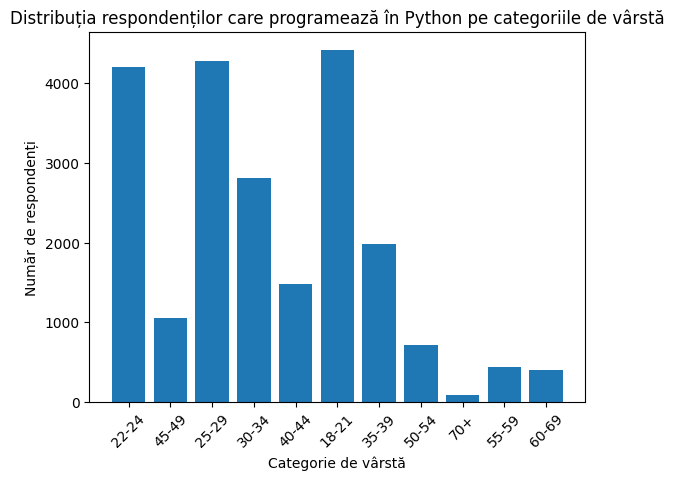

Distribuția pe vârste a respondenților care programează în Python:
22-24: 4204 persoane
45-49: 1054 persoane
25-29: 4283 persoane
30-34: 2805 persoane
40-44: 1486 persoane
18-21: 4420 persoane
35-39: 1978 persoane
50-54: 713 persoane
70+: 82 persoane
55-59: 434 persoane
60-69: 400 persoane


In [74]:
age_data_2 = extractFeature(data, dataNames, "Q1")
python_data = extractFeature(data, dataNames, "Q7_Part_1")
python_age_data = []
for cat, py in zip(age_data_2, python_data):
    if py:
        python_age_data.append(cat)

age_dist = {}
for category in python_age_data[2:]:
    if category in age_dist:
        age_dist[category] += 1
    else:
        age_dist[category] = 1
    
categories = list(age_dist.keys())
counts = list(age_dist.values())
    
plt.bar(categories, counts)
plt.title('Distribuția respondenților care programează în Python pe categoriile de vârstă')
plt.xlabel('Categorie de vârstă')
plt.ylabel('Număr de respondenți')
plt.xticks(rotation=45)
plt.show()

print("Distribuția pe vârste a respondenților care programează în Python:")
for category, count in age_dist.items():
    print(f"{category}: {count} persoane")



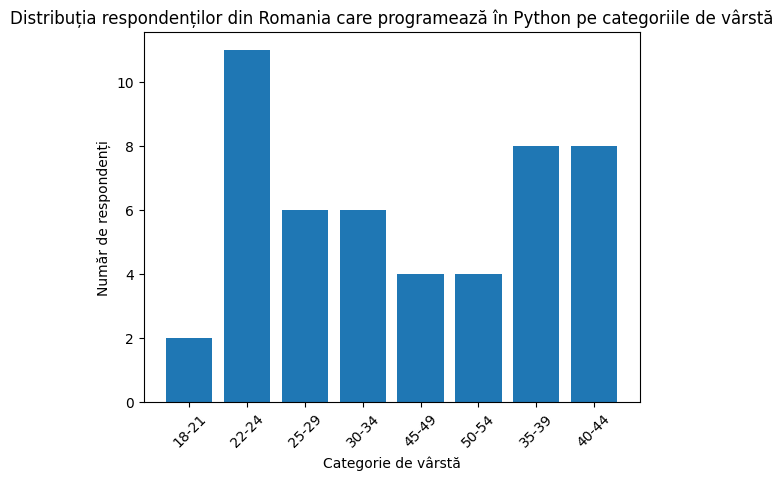

Distribuția pe vârste a respondenților care programează în Python:
18-21: 2 persoane
22-24: 11 persoane
25-29: 6 persoane
30-34: 6 persoane
45-49: 4 persoane
50-54: 4 persoane
35-39: 8 persoane
40-44: 8 persoane


In [72]:
country_data = extractFeature(data, dataNames, "Q3")
age_data_2 = extractFeature(data, dataNames, "Q1")
python_data = extractFeature(data, dataNames, "Q7_Part_1")
python_age_data = []
for cat, py,coun in zip(age_data_2, python_data,country_data):
    if py and coun == "Romania":
        python_age_data.append(cat)

age_dist = {}
for category in python_age_data[2:]:
    if category in age_dist:
        age_dist[category] += 1
    else:
        age_dist[category] = 1
    
categories = list(age_dist.keys())
counts = list(age_dist.values())
    
plt.bar(categories, counts)
plt.title('Distribuția respondenților din Romania care programează în Python pe categoriile de vârstă')
plt.xlabel('Categorie de vârstă')
plt.ylabel('Număr de respondenți')
plt.xticks(rotation=45)
plt.show()

print("Distribuția pe vârste a respondenților care programează în Python:")
for category, count in age_dist.items():
    print(f"{category}: {count} persoane")

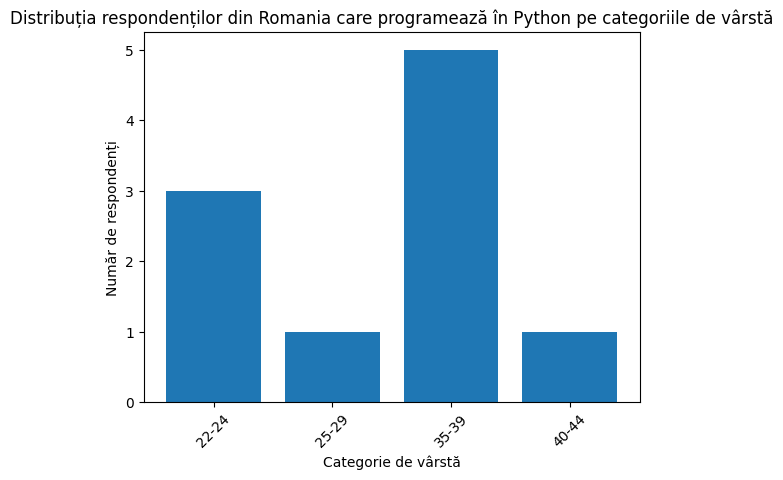

Distribuția pe vârste a respondenților care programează în Python:
22-24: 3 persoane
25-29: 1 persoane
35-39: 5 persoane
40-44: 1 persoane


In [75]:
gen_data = extractFeature(data, dataNames, "Q2")
country_data = extractFeature(data, dataNames, "Q3")
age_data_2 = extractFeature(data, dataNames, "Q1")
python_data = extractFeature(data, dataNames, "Q7_Part_1")
python_age_data = []
for cat, py,coun,gen in zip(age_data_2, python_data,country_data,gen_data):
    if py and coun == "Romania" and gen == "Woman":
        python_age_data.append(cat)

age_dist = {}
for category in python_age_data[2:]:
    if category in age_dist:
        age_dist[category] += 1
    else:
        age_dist[category] = 1
    
categories = list(age_dist.keys())
counts = list(age_dist.values())
    
plt.bar(categories, counts)
plt.title('Distribuția respondenților din Romania care programează în Python pe categoriile de vârstă')
plt.xlabel('Categorie de vârstă')
plt.ylabel('Număr de respondenți')
plt.xticks(rotation=45)
plt.show()

print("Distribuția pe vârste a respondenților care programează în Python:")
for category, count in age_dist.items():
    print(f"{category}: {count} persoane")



In [76]:
# Funcție pentru a transforma intervalele de vechime în valori numerice
def convert_experience_to_years(experience_data):
    years = []
    for experience in experience_data[2:]:
        experience = experience.strip().lower()
        if experience == 'i have never written code' or experience == 'i have never coded before':
            years.append(0)  # Considerăm 0 ani pentru persoanele care nu au scris niciodată cod
        elif '< 1 year' in experience:
            years.append(0.5)  # Presupunem că <1 year înseamnă 0.5 ani
        elif '20+ years' in experience:
            years.append(20)  # Considerăm 20+ years ca fiind 20 ani
        elif 'years' in experience:
            # Dacă avem un interval de tipul "3-5 years", calculăm media acestuia (4 ani)
            parts = experience.split('-')
            if len(parts) == 2:
                start = float(parts[0])
                end = float(parts[1].replace('years', '').strip())
                years.append((start + end) / 2)  # Media intervalului
            else:
                years.append(float(experience.replace('years', '').strip()))
        else:
            years.append(0)  # Dacă nu se pot interpreta, setăm ca 0 ani
    return years

# Funcție pentru a construi boxplot-ul pentru vechimea în programare și a identifica outlieri
def identify_outliers_in_experience(data, dataNames):
    # Extragem coloana de vechime în programare
    experience_data = extractFeature(data, dataNames, "Q6")
    
    # Transformăm vechimea în valori numerice (ani)
    experience = convert_experience_to_years(experience_data)
    
    
    # Identificăm outlierii din date
    q1 = np.percentile(experience, 25)  # 1st quartile
    q3 = np.percentile(experience, 75)  # 3rd quartile
    iqr = q3 - q1  # Interquartile range
    lower_bound = q1 - 1.5 * iqr  # Limita inferioară
    upper_bound = q3 + 1.5 * iqr  # Limita superioară
    
    # Identificăm outlierii care sunt mai mici decât limita inferioară sau mai mari decât limita superioară
    outliers = [exper for exper in experience if exper < lower_bound or exper > upper_bound]
    
    # Returnăm outlierii și boxplot-ul
    return outliers, experience


#Identificăm outlierii în funcție de vechimea în programare
outliers, experience_data = identify_outliers_in_experience(data, dataNames)

#Afișăm outlierii și distribuția acestora
print("Outlierii din punct de vedere al vechimii în programare (ani):")
print(outliers)

Outlierii din punct de vedere al vechimii în programare (ani):
[20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 